# CW 02 Part 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import misc
from PIL import Image

In [ ]:
array_size = 300e-6  
num_pixels = 512  # Resolution

dx = array_size / num_pixels  # Pixel size

wvl = 633e-9
dz = 30e-6

# Create spatial coordinate grid
x = np.linspace(-array_size / 2, array_size / 2, num_pixels)
y = np.linspace(-array_size / 2, array_size / 2, num_pixels)
X, Y = np.meshgrid(x, y)

# Q1

Build a wave propagation function that calculates the output field by iteratively propagating wave a "d_z" distance in a for loop with angular spectrum method. After each propagation step apply the absorptive boundary to avoid wraparound.

In [ ]:
def angular_spectrum_propagation_range(U0, wvl, dx, dz, num_steps, absorptive_boundary= False):
    """
    Arguments:
    U0 : 2D numpy array
        The input field (complex amplitude) to be propagated.
    wvl : float
        Wavelength of the light.
    dx : float
        Pixel size in the spatial domain.
    dz : float
        Propagation distance for each step.
    num_steps : int
        Number of propagation steps.
    absorptive_boundary : bool, optional
        If True, apply an absorptive boundary to avoid wraparound.
    """
    
    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # Initialize list to store results
    U_list = []
    
    # Apply super Gaussian absorptive boundary
    if absorptive_boundary:
        sigma = nx/3.5  # Standard deviation for Gaussian
        X, Y = np.meshgrid(np.linspace(-nx/2, nx/2, nx), np.linspace(-ny/2, ny/2, ny))
        window = np.exp(-((X**2 + Y**2) / (2 * sigma**2))**4)
    else:
        window = np.ones_like(U0)
        
    # FILL HERE
        
    return U_list


# Q2
Propagate the provided image to 300 um, show the intensity distribution of the field and backpropagate the field to the same plane

C:\Users\ilker\AppData\Local\Temp\ipykernel_92492\2839698563.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  cameraman_image = misc.face(gray=True)


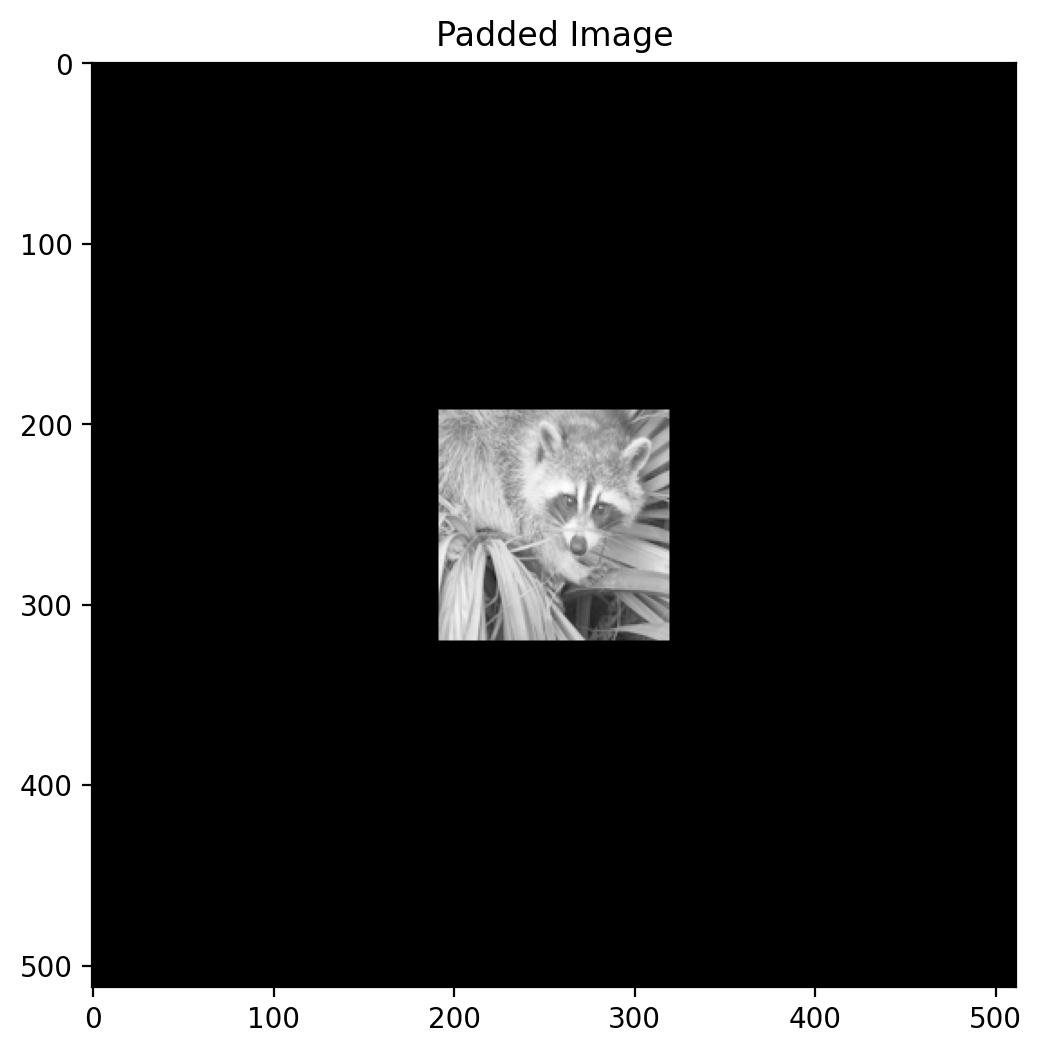

In [202]:


# Load the cameraman image
cameraman_image = misc.face(gray=True)
# Resize the image to nx/4 resolution
cameraman_image_pil = Image.fromarray(cameraman_image)
resized_image_pil = cameraman_image_pil.resize((num_pixels // 4, num_pixels // 4))
resized_image = np.sqrt(np.array(resized_image_pil)/255.0)

# Pad the image to nx resolution
padded_image = np.pad(resized_image, 
                      (((num_pixels - resized_image.shape[0]) // 2,), 
                       ((num_pixels - resized_image.shape[1]) // 2,)), 
                      mode='constant')

plt.figure(figsize=(6, 6),dpi = 200)
plt.imshow(padded_image, cmap="gray")
plt.title("Padded Image")
plt.show()

# Q3
Propagate the provided image to 1 mm, show the intensity distribution of the field and backpropagate the field to the same plane